In [21]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv("../../../files/df_nulos_imputados.csv", index_col=0)

In [23]:
df.head()

,EmployeeID,Age,Gender,MaritalStatus,DateBirth,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,OverTime,DistanceFromHome,RemoteWork,BusinessTravel,TrainingTimesLastYear,JobRole,JobLevel,DailyRate,HourlyRate,MonthlyRate,PercentSalaryHike,StockOptionLevel,Salary
0,162,51,Male,Unknown,1972,3,Unknown,7,11.144344,20,15,15,1,3,3,3.000000,3,3.0,No,0.000000,6,1,Unknown,5,research director,5,684.0,51.0,6462.0,13,0,1000000000
1,259,52,Male,Unknown,1971,4,Life Sciences,0,34.000000,33,11,9,1,3,1,3.000000,2,3.0,No,0.265372,1,1,Unknown,5,manager,5,699.0,65.0,5678.0,14,1,1000000000
2,319,42,Male,Married,1981,2,Technical Degree,1,22.000000,22,11,15,1,4,4,2.787874,3,3.0,No,0.000000,4,1,travel_rarely,3,manager,5,532.0,58.0,4933.0,11,0,1000000000
3,nan1,47,Female,Married,1976,4,Medical,3,10.844380,20,5,6,1,3,2,2.793950,3,3.0,No,0.257984,2,0,travel_rarely,2,research director,4,359.0,82.0,26703.0,19,2,1000000000
4,nan2,46,Female,Divorced,1977,3,Technical Degree,2,11.732127,19,2,8,1,1,4,3.000000,4,3.0,No,0.000000,3,0,Unknown,5,sales executive,4,1319.0,45.0,7739.0,12,1,1000000000


Vamos a comparar cada una de las columnas de satisfacción ('EnvironmentSatisfaction','RelationshipSatisfaction' y JobSatisfaction) con la columna de attrition, para ver si alguna de ellas tiene relación con que los empleados se hayan ido de la empresa o no. 

In [24]:
#df['OverallSatisfaction'] = df.apply(lambda x: int(round((x['EnvironmentSatisfaction'] + x['JobSatisfaction'] + x['RelationshipSatisfaction']) / 3 , 0)), axis=1)

In [25]:
#empezamos con EnvironmentSatisfaction. Creamos una nueva columna a la que llamaremos TestGroupES, y crearemos dos grupos: 
#satisfechos, los que tienen un índice de satisfacción de 3 o 4; e insatisfechos, los que tienen un índice de satisfacción menos que 3
df['TestGroupES'] = df['EnvironmentSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [26]:
df.head(5)

,EmployeeID,Age,Gender,MaritalStatus,DateBirth,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,OverTime,DistanceFromHome,RemoteWork,BusinessTravel,TrainingTimesLastYear,JobRole,JobLevel,DailyRate,HourlyRate,MonthlyRate,PercentSalaryHike,StockOptionLevel,Salary,TestGroupES
0,162,51,Male,Unknown,1972,3,Unknown,7,11.144344,20,15,15,1,3,3,3.000000,3,3.0,No,0.000000,6,1,Unknown,5,research director,5,684.0,51.0,6462.0,13,0,1000000000,insatisfechos
1,259,52,Male,Unknown,1971,4,Life Sciences,0,34.000000,33,11,9,1,3,1,3.000000,2,3.0,No,0.265372,1,1,Unknown,5,manager,5,699.0,65.0,5678.0,14,1,1000000000,insatisfechos
2,319,42,Male,Married,1981,2,Technical Degree,1,22.000000,22,11,15,1,4,4,2.787874,3,3.0,No,0.000000,4,1,travel_rarely,3,manager,5,532.0,58.0,4933.0,11,0,1000000000,insatisfechos
3,nan1,47,Female,Married,1976,4,Medical,3,10.844380,20,5,6,1,3,2,2.793950,3,3.0,No,0.257984,2,0,travel_rarely,2,research director,4,359.0,82.0,26703.0,19,2,1000000000,insatisfechos
4,nan2,46,Female,Divorced,1977,3,Technical Degree,2,11.732127,19,2,8,1,1,4,3.000000,4,3.0,No,0.000000,3,0,Unknown,5,sales executive,4,1319.0,45.0,7739.0,12,1,1000000000,insatisfechos


In [27]:
tabla_contingencia_porcentaje_ES = pd.crosstab(df['TestGroupES'], df['Attrition'], normalize = True) * 100
tabla_contingencia_ES = pd.crosstab(df['TestGroupES'], df['Attrition']) 
tabla_contingencia_ES

Attrition,No,Yes
TestGroupES,,
insatisfechos,1264,248
satisfechos,47,4


In [28]:
tabla_contingencia_porcentaje_ES

Attrition,No,Yes
TestGroupES,,
insatisfechos,80.870122,15.866923
satisfechos,3.007038,0.255918


H0 = No existe diferencia signiticativa entre ambos grupos

H1 = Existe diferencia significativa entre ambos grupos

p-value < 0.05 rechazamos h0

p-value > 0.05 aceptamos h0

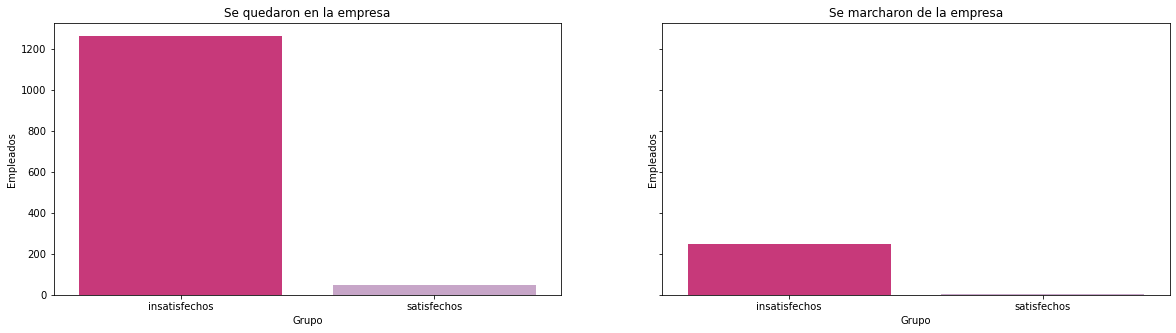

In [29]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia_ES.index, y="No", data=tabla_contingencia_ES,  palette = "PuRd_r", ax = axes[0])
sns.barplot(x=tabla_contingencia_ES.index, y="Yes", data=tabla_contingencia_ES,  palette = "PuRd_r", ax = axes[1])

axes[0].set_title("Se quedaron en la empresa")
axes[1].set_title("Se marcharon de la empresa")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("Empleados");

In [30]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia_ES)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 0.14952474465126114 no hay una diferencia significativa en la cantidad de attrition según el grupo


**Análisis**: 
- A priori sí vemos una diferencia en el attrition según el grupo al que pertenecen los empleados, pero al realizar el análisis (y dado el posible impacto del total de insatisfechos) esta diferencia no resulta ser significativa
- No podemos rechazar la hipótesis nula, ya que no existe una diferencia signiticativa entre ambos grupos (satisfechos e insatisfechos)
- Observamos que hay una elevada cantidad de empleados comprendidos dentro de 'insatisfechos'


In [32]:
#Veamos ahora qué ocurre con JobSatisfaction. Creamos una nueva columna a la que llamaremos TestGroupJS, y crearemos dos grupos: 
#satisfechos, los que tienen un índice de satisfacción de 3 o 4; e insatisfechos, los que tienen un índice de satisfacción menos que 3
df['TestGroupJS'] = df['JobSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [33]:
df.head(5)

,EmployeeID,Age,Gender,MaritalStatus,DateBirth,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,OverTime,DistanceFromHome,RemoteWork,BusinessTravel,TrainingTimesLastYear,JobRole,JobLevel,DailyRate,HourlyRate,MonthlyRate,PercentSalaryHike,StockOptionLevel,Salary,TestGroupES,TestGroupJS
0,162,51,Male,Unknown,1972,3,Unknown,7,11.144344,20,15,15,1,3,3,3.000000,3,3.0,No,0.000000,6,1,Unknown,5,research director,5,684.0,51.0,6462.0,13,0,1000000000,insatisfechos,satisfechos
1,259,52,Male,Unknown,1971,4,Life Sciences,0,34.000000,33,11,9,1,3,1,3.000000,2,3.0,No,0.265372,1,1,Unknown,5,manager,5,699.0,65.0,5678.0,14,1,1000000000,insatisfechos,satisfechos
2,319,42,Male,Married,1981,2,Technical Degree,1,22.000000,22,11,15,1,4,4,2.787874,3,3.0,No,0.000000,4,1,travel_rarely,3,manager,5,532.0,58.0,4933.0,11,0,1000000000,insatisfechos,satisfechos
3,nan1,47,Female,Married,1976,4,Medical,3,10.844380,20,5,6,1,3,2,2.793950,3,3.0,No,0.257984,2,0,travel_rarely,2,research director,4,359.0,82.0,26703.0,19,2,1000000000,insatisfechos,satisfechos
4,nan2,46,Female,Divorced,1977,3,Technical Degree,2,11.732127,19,2,8,1,1,4,3.000000,4,3.0,No,0.000000,3,0,Unknown,5,sales executive,4,1319.0,45.0,7739.0,12,1,1000000000,insatisfechos,insatisfechos


In [34]:
tabla_contingencia_porcentaje_JS = pd.crosstab(df['TestGroupJS'], df['Attrition'], normalize = True) * 100
tabla_contingencia_JS = pd.crosstab(df['TestGroupJS'], df['Attrition']) 
tabla_contingencia_JS

Attrition,No,Yes
TestGroupJS,,
insatisfechos,486,121
satisfechos,825,131


In [35]:
#lo vemos en porcentaje
tabla_contingencia_porcentaje_JS

Attrition,No,Yes
TestGroupJS,,
insatisfechos,31.094050,7.741523
satisfechos,52.783109,8.381318


H0 = No existe diferencia signiticativa entre ambos grupos

H1 = Existe diferencia significativa entre ambos grupos

p-value < 0.05 rechazamos h0

p-value > 0.05 aceptamos h0

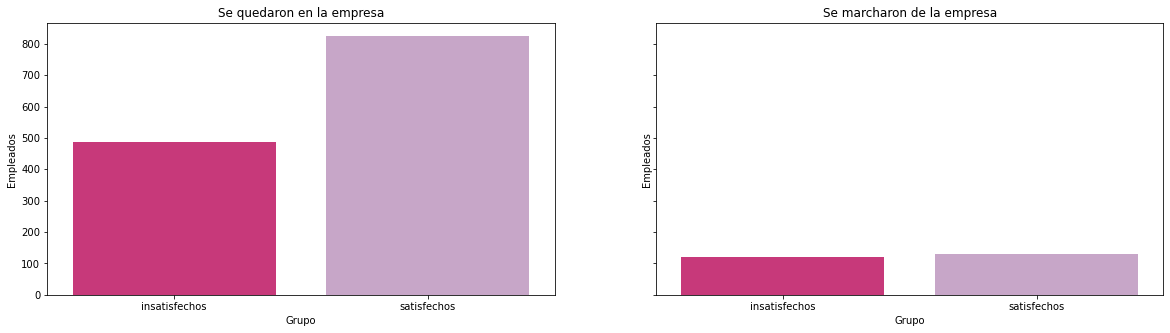

In [36]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia_JS.index, y="No", data=tabla_contingencia_JS,  palette = "PuRd_r", ax = axes[0])
sns.barplot(x=tabla_contingencia_JS.index, y="Yes", data=tabla_contingencia_JS,  palette = "PuRd_r", ax = axes[1])

axes[0].set_title("Se quedaron en la empresa")
axes[1].set_title("Se marcharon de la empresa")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("Empleados");

In [37]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia_JS)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 0.0014014887471835308 hay una diferencia significativa en la cantidad de attrition según el grupo


**Análisis**: 
- A priori sí vemos una diferencia en el attrition según el grupo al que pertenecen los empleados (gráfico)
- Tras realizar el test del chi-quadrado, comprobamos que podemos rechazar la hipótesis nula, es decir, que existe una diferencia signiticativa entre ambos grupos (satisfechos e insatisfechos)
- La columna de Jobsatisfaction nos indica que es una factor que sí influye en que haya rotación de empleados

In [38]:
#Veamos ahora qué ocurre con RelationshipSatisfaction. Creamos una nueva columna a la que llamaremos TestGroupRS, y crearemos dos grupos: 
#satisfechos, los que tienen un índice de satisfacción de 3 o 4; e insatisfechos, los que tienen un índice de satisfacción menos que 3
df['TestGroupRS'] = df['RelationshipSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [39]:
df.head(5)

,EmployeeID,Age,Gender,MaritalStatus,DateBirth,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,OverTime,DistanceFromHome,RemoteWork,BusinessTravel,TrainingTimesLastYear,JobRole,JobLevel,DailyRate,HourlyRate,MonthlyRate,PercentSalaryHike,StockOptionLevel,Salary,TestGroupES,TestGroupJS,TestGroupRS
0,162,51,Male,Unknown,1972,3,Unknown,7,11.144344,20,15,15,1,3,3,3.000000,3,3.0,No,0.000000,6,1,Unknown,5,research director,5,684.0,51.0,6462.0,13,0,1000000000,insatisfechos,satisfechos,satisfechos
1,259,52,Male,Unknown,1971,4,Life Sciences,0,34.000000,33,11,9,1,3,1,3.000000,2,3.0,No,0.265372,1,1,Unknown,5,manager,5,699.0,65.0,5678.0,14,1,1000000000,insatisfechos,satisfechos,insatisfechos
2,319,42,Male,Married,1981,2,Technical Degree,1,22.000000,22,11,15,1,4,4,2.787874,3,3.0,No,0.000000,4,1,travel_rarely,3,manager,5,532.0,58.0,4933.0,11,0,1000000000,insatisfechos,satisfechos,satisfechos
3,nan1,47,Female,Married,1976,4,Medical,3,10.844380,20,5,6,1,3,2,2.793950,3,3.0,No,0.257984,2,0,travel_rarely,2,research director,4,359.0,82.0,26703.0,19,2,1000000000,insatisfechos,satisfechos,insatisfechos
4,nan2,46,Female,Divorced,1977,3,Technical Degree,2,11.732127,19,2,8,1,1,4,3.000000,4,3.0,No,0.000000,3,0,Unknown,5,sales executive,4,1319.0,45.0,7739.0,12,1,1000000000,insatisfechos,insatisfechos,satisfechos


In [40]:
tabla_contingencia_porcentaje_RS = pd.crosstab(df['TestGroupRS'], df['Attrition'], normalize = True) * 100
tabla_contingencia_RS = pd.crosstab(df['TestGroupRS'], df['Attrition']) 
tabla_contingencia_RS

Attrition,No,Yes
TestGroupRS,,
insatisfechos,511,106
satisfechos,800,146


In [41]:
tabla_contingencia_porcentaje_RS

Attrition,No,Yes
TestGroupRS,,
insatisfechos,32.693538,6.781830
satisfechos,51.183621,9.341011


H0 = No existe diferencia signiticativa entre ambos grupos

H1 = Existe diferencia significativa entre ambos grupos

p-value < 0.05 rechazamos h0

p-value > 0.05 aceptamos h0

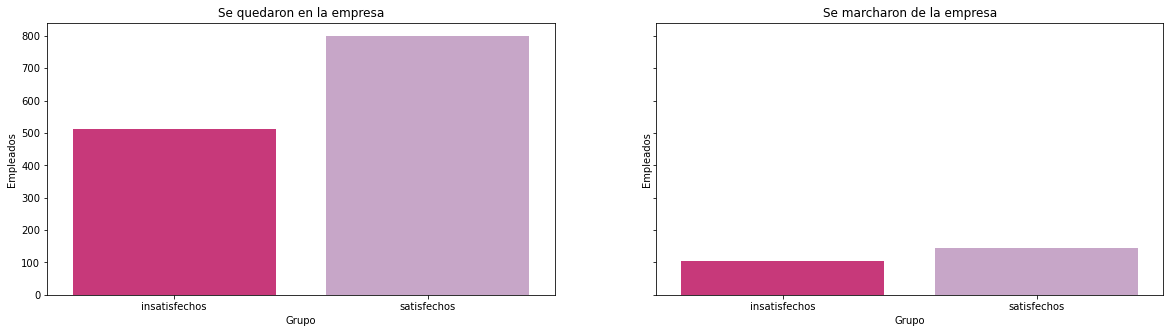

In [42]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia_RS.index, y="No", data=tabla_contingencia_RS,  palette = "PuRd_r", ax = axes[0])
sns.barplot(x=tabla_contingencia_RS.index, y="Yes", data=tabla_contingencia_RS,  palette = "PuRd_r", ax = axes[1])

axes[0].set_title("Se quedaron en la empresa")
axes[1].set_title("Se marcharon de la empresa")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("Empleados");

In [43]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia_RS)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 0.3967654071376123 no hay una diferencia significativa en la cantidad de attrition según el grupo


**Análisis**: 
- A priori sí vemos una diferencia en el attrition según el grupo al que pertenecen los empleados, pero al realizar el análisis (y dado el posible impacto del total de insatisfechos) esta diferencia no resulta ser significativa
- No podemos rechazar la hipótesis nula, ya que no existe una diferencia signiticativa entre ambos grupos (satisfechos e insatisfechos)
- Observamos que hay una elevada cantidad de empleados comprendidos dentro de 'insatisfechos'